<a href="https://colab.research.google.com/github/Cooper2112/SQC/blob/main/SQCLab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import random
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data2 = pd.read_csv('drive/My Drive/Colab Notebooks/HeliData.csv', sep=',')

data2


,Design,PaperClip,BladeLength,SupportWidth,HangTime
0,1,1,3.5625,1.5625,1.77
1,1,1,3.5625,1.5625,1.79
2,1,1,3.5625,1.5625,1.78
3,1,1,3.5625,1.5625,1.75
4,1,1,3.5625,1.5625,1.68
5,2,1,2.5000,1.2500,1.50
6,2,1,2.5000,1.2500,1.60
7,2,1,2.5000,1.2500,1.42
8,2,1,2.5000,1.2500,1.36
9,2,1,2.5000,1.2500,1.50


In [ ]:
data2.head()

,Design,PaperClip,BladeLength,SupportWidth,HangTime
0,1,1,3.5625,1.5625,1.77
1,1,1,3.5625,1.5625,1.79
2,1,1,3.5625,1.5625,1.78
3,1,1,3.5625,1.5625,1.75
4,1,1,3.5625,1.5625,1.68


In [ ]:
model = ols('HangTime ~ C(PaperClip) + C(BladeLength) + C(PaperClip):C(BladeLength)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(PaperClip),0.253500,1.0,9.649367,3.065765e-03
C(BladeLength),4.470383,3.0,56.721063,2.057184e-16
C(PaperClip):C(BladeLength),0.087790,3.0,1.113896,3.519193e-01
Residual,1.366100,52.0,NaN,NaN


In [ ]:
model = ols('HangTime ~ C(PaperClip) + C(SupportWidth) + C(PaperClip):C(SupportWidth)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(PaperClip),0.253500,1.0,15.418145,2.747640e-04
C(SupportWidth),5.039353,5.0,61.299787,1.116937e-19
C(PaperClip):C(SupportWidth),0.095720,5.0,1.164359,3.404060e-01
Residual,0.789200,48.0,NaN,NaN


In [ ]:
model = ols('HangTime ~ C(BladeLength) + C(SupportWidth) + C(BladeLength):C(SupportWidth)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1850: RuntimeWarning: invalid value encountered in true_divide
  F /= J
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 3
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
C(BladeLength),NaN,3.0,NaN,NaN
C(SupportWidth),4.294796,5.0,40.744009,4.120599e-08
C(BladeLength):C(SupportWidth),42.009666,15.0,132.846223,6.598991e-25
Residual,1.138420,54.0,NaN,NaN


In [ ]:
model = ols('Design ~ C(BladeLength) + C(SupportWidth) + C(BladeLength):C(SupportWidth)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1850: RuntimeWarning: invalid value encountered in true_divide
  F /= J
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 3
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
C(BladeLength),NaN,3.0,NaN,NaN
C(SupportWidth),911.058824,5.0,18.221176,0.000080
C(BladeLength):C(SupportWidth),236.000000,15.0,1.573333,0.206453
Residual,540.000000,54.0,NaN,NaN


In [ ]:
model = ols('Design ~ C(PaperClip) + C(SupportWidth) + C(PaperClip):C(SupportWidth)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(PaperClip),5.400000e+02,1.0,3.182325e+31,0.000000
C(SupportWidth),1.750000e+02,5.0,2.062618e+30,0.000000
C(PaperClip):C(SupportWidth),1.563476e-29,5.0,1.842773e-01,0.967198
Residual,8.144989e-28,48.0,NaN,NaN


In [ ]:
model = ols('Design ~ C(PaperClip) + C(BladeLength) + C(PaperClip):C(BladeLength)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(PaperClip),5.400000e+02,1.0,2.808000e+02,1.307938e-22
C(BladeLength),7.500000e+01,3.0,1.300000e+01,1.877190e-06
C(PaperClip):C(BladeLength),5.581602e-29,3.0,9.674776e-30,1.000000e+00
Residual,1.000000e+02,52.0,NaN,NaN


In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               HangTime   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     47.81
Date:                Tue, 04 Oct 2022   Prob (F-statistic):           1.24e-18
Time:                        21:48:41   Log-Likelihood:                 33.805
No. Observations:                  60   AIC:                            -55.61
Df Residuals:                      54   BIC:                            -43.04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [14]:
se= model.mse_resid/(3*(2**3))
se

0.08012820512820511

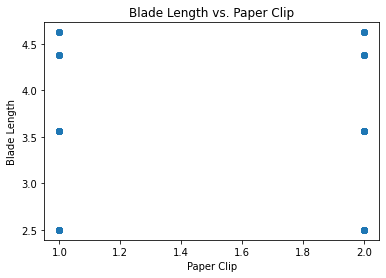

In [15]:
import matplotlib.pyplot as plt

plt.scatter(data2.PaperClip, data2.BladeLength)
plt.title('Blade Length vs. Paper Clip')
plt.xlabel('Paper Clip')
plt.ylabel('Blade Length')
plt.show()

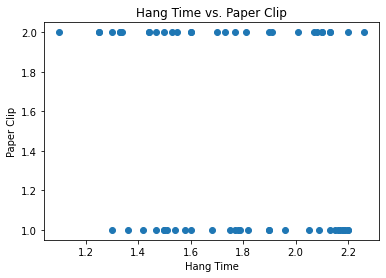

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data2.HangTime, data2.PaperClip)
plt.title('Hang Time vs. Paper Clip')
plt.xlabel('Hang Time')
plt.ylabel('Paper Clip')
plt.show()

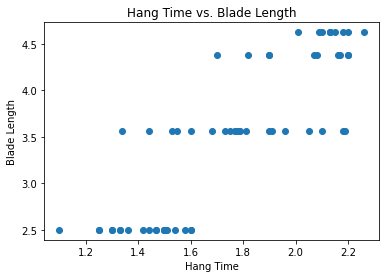

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data2.HangTime, data2.BladeLength)
plt.title('Hang Time vs. Blade Length')
plt.xlabel('Hang Time')
plt.ylabel('Blade Length')
plt.show()

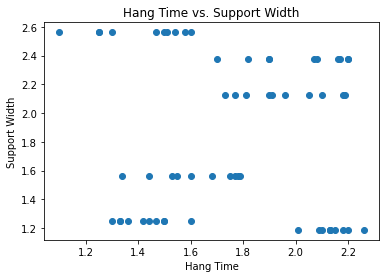

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data2.HangTime, data2.SupportWidth)
plt.title('Hang Time vs. Support Width')
plt.xlabel('Hang Time')
plt.ylabel('Support Width')
plt.show()

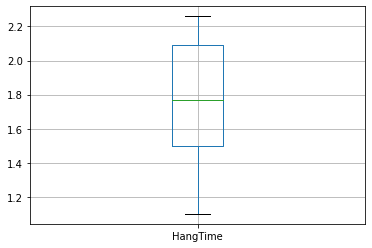

In [ ]:
data2.boxplot(column=['HangTime'])

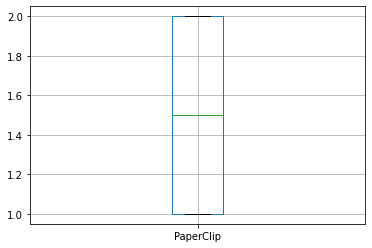

In [ ]:
data2.boxplot(column=['PaperClip'])

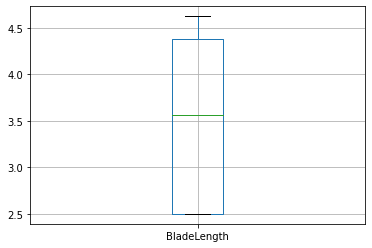

In [ ]:
data2.boxplot(column=['BladeLength'])

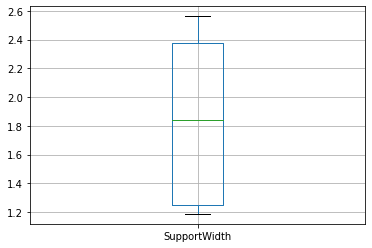

In [ ]:
data2.boxplot(column=['SupportWidth'])

In [ ]:
import statsmodels.api as sm

y = data2['HangTime']

x = data2[['PaperClip', 'BladeLength', 'SupportWidth']]

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               HangTime   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     61.29
Date:                Tue, 04 Oct 2022   Prob (F-statistic):           1.09e-17
Time:                        18:53:00   Log-Likelihood:                 26.707
No. Observations:                  60   AIC:                            -45.41
Df Residuals:                      56   BIC:                            -37.04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7044      0.140      5.048   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Paper Clip Residual Plots

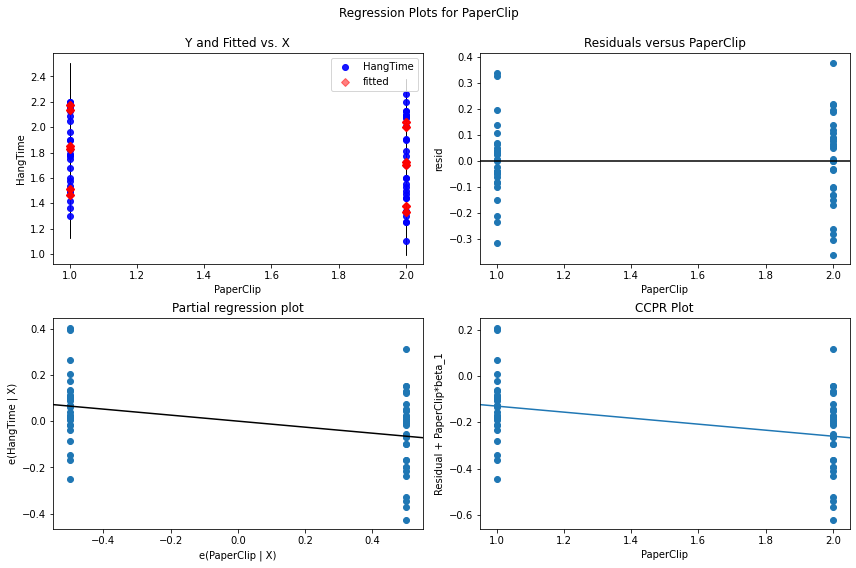

In [ ]:
fig = plt.figure(figsize=(12,8))


fig = sm.graphics.plot_regress_exog(model, 'PaperClip', fig=fig)

## Blade Length Residual Plots

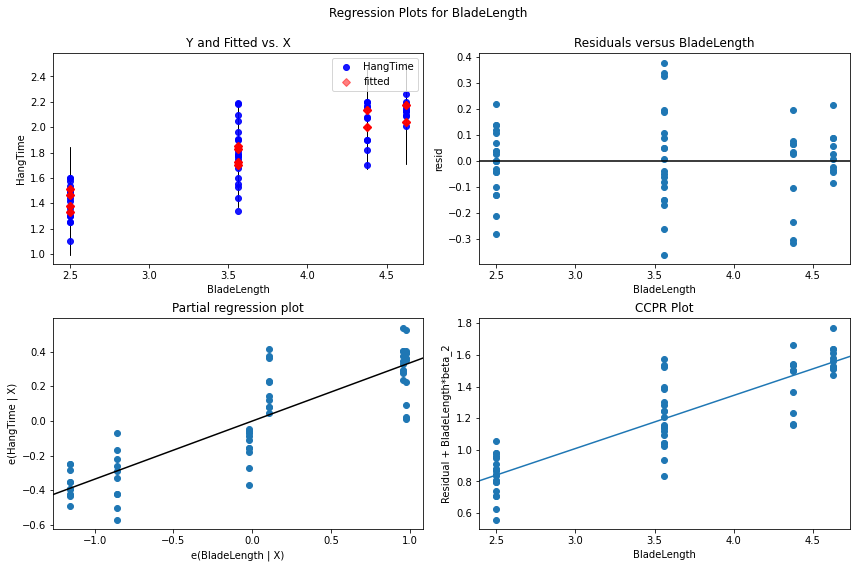

In [ ]:
fig = plt.figure(figsize=(12,8))


fig = sm.graphics.plot_regress_exog(model, 'BladeLength', fig=fig)

## Support Width Residual Plots

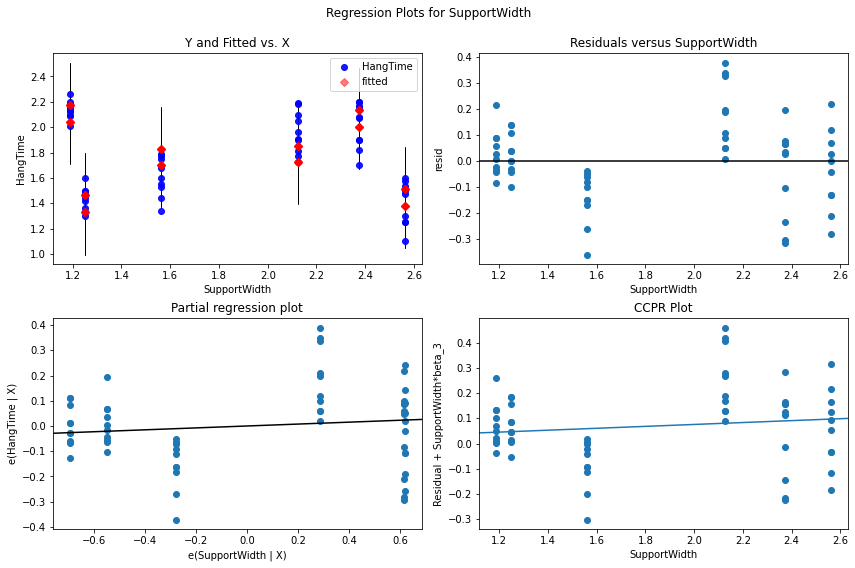

In [ ]:
fig = plt.figure(figsize=(12,8))


fig = sm.graphics.plot_regress_exog(model, 'SupportWidth', fig=fig)

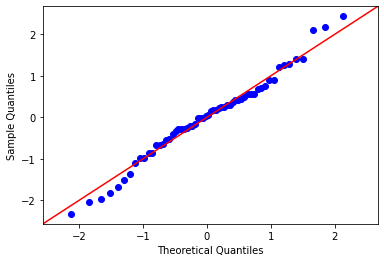

In [ ]:
res = model.resid


fig = sm.qqplot(res, fit=True, line="45")
plt.show() 